In [2]:
import pandas as pd
import matplotlib as mlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np

mylist = []

for chunk in pd.read_csv('../../events.csv', low_memory=False, chunksize=20000):
    mylist.append(chunk)

df_events = pd.concat(mylist, axis= 0)
del mylist



In [3]:
df_events.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [4]:
df_events['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [5]:
# 1) Cantidad de visitas segun pais

df_1 = df_events[(df_events["event"]=="visited site") | (df_events["event"]=="ad campaign hit")]

In [6]:
df_1[df_1["event"]=="ad campaign hit"]["country"].value_counts()

## Esto lleva a no saber en qué paises conviene poner publicidad,
## dado que falta la información del pais para el evento "ad campaign hit"

## Si se tuviera esa información, se podría invertir más plata en publicidades
## para aquellos países que tienen un mayor ratio personas <-> publicidades clickeadas,
## o también visitas al sitio <-> publicidades clickeadas

Series([], Name: country, dtype: int64)

In [7]:
## 2) Publicidades más clickeadas

df_events[df_events["event"]=="ad campaign hit"]["url"].value_counts().head(6)

/                            28323
/comprar/iphone               4132
/comprar/iphone/6s            3393
/comprar/iphone/6             3228
/comprar/samsung              2782
/comprar/iphone/iphone-5s     2689
Name: url, dtype: int64

In [8]:
df_events[df_events["event"]=="ad campaign hit"].head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2018-04-09 20:12:31,ad campaign hit,000a54b2,/,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2018-05-24 11:21:07,ad campaign hit,000a54b2,/,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,2018-05-17 00:08:56,ad campaign hit,0019c395,/comprar/samsung/galaxy-j5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
## Eventos vender
df_events["es_vender"] = df_events[df_events["event"]=="ad campaign hit"]["url"].str.contains("/vender")
df_vendiendo = df_events[df_events["es_vender"]==True]

## Personas vendiendo
df_vendiendo["person"].value_counts()

## Modelos a vender
df_vendiendo["url"].value_counts()

## Podemos ver que las url a las que llegaron los usuarios son de brasil, por lo que tal vez
## personas de otros países no esten queriendo/intentando/pudiendo vender (argentina no puede por ej.)

# Los modelos a vender son más viejos que los que se quieren comprar, no hay muchas ventas de modelos nuevos

/vender/                                      138
/vender/lg                                     22
/vender/motorola/moto-g5-plus                  19
/vender/motorola/moto-z2-play                  14
/vender/samsung/galaxy-s5                       8
/vender/motorola/moto-z2-force                  6
/vender/lg/lg-l80-dual                          4
/vender/samsung/galaxy-s8-plus                  3
/vender/motorola/moto-g5s-plus                  2
/vender/motorola/moto-e-2a-geracao-4g-dual      2
/vender                                         2
/vender/motorola                                1
Name: url, dtype: int64

In [18]:
# Eventos comprar
df_events["es_comprar"] = df_events[df_events["event"]=="ad campaign hit"]["url"].str.contains("/comprar")
df_comprando = df_events[df_events["es_comprar"]==True]

# Personas comprando
# df_comprando["person"].value_counts()

# Modelos a comprar
df_comprando["url"].value_counts().head(10)

## Vemos que las marcas que insinúan a la gente a clickear las publicidades son
## iphone, samsung y motorola (en orden)

/comprar/iphone                    4132
/comprar/iphone/6s                 3393
/comprar/iphone/6                  3228
/comprar/samsung                   2782
/comprar/iphone/iphone-5s          2689
/comprar/samsung/galaxy-j5         2446
/comprar/samsung/galaxy-s7-edge    1972
/comprar/samsung/galaxy-s8         1499
/comprar/samsung/galaxy-j7         1465
/comprar/samsung/galaxy-s6-edge    1415
Name: url, dtype: int64

In [19]:
# Los menos interesantes
df_comprando["url"].value_counts().tail(10)

/comprar/lg/lg-g4-stylus-hdtv-h540t         1
/comprar/lg/lg-g-pro-lite-dual-d685         1
/comprar/iphone/iphone-5/                   1
/comprar/lg/lg-g2-mini-d618-dual            1
/comprar/lg/lg-g2-mini-d618                 1
/comprar/samsung/galaxy-mega-duos           1
/comprar/samsung/galaxy-tab-e-96-wifi-3g    1
/comprar/ipad/ipad-mini-2-wi-fi             1
/comprar/motorola/moto-x                    1
/comprar/ipad/3-wi-fi-4g                    1
Name: url, dtype: int64

In [11]:
# 3) Checkout y conversion - Patrones segun usuarios

checkyconv_events = df_events[(df_events["event"]=="conversion") | (df_events["event"]=="checkout")]

persons_array = checkyconv_events["person"].value_counts().head(100).index.values

In [12]:
df_personas_checkyconv = df_events[df_events["person"].isin(persons_array)]

In [13]:
# El evento "visited site" es el unico que recopila informacion sobre el tipo de dispositivo
personas_smartphone = df_personas_checkyconv[df_personas_checkyconv["device_type"]=="Smartphone"]["person"].value_counts().index.values
personas_computer = df_personas_checkyconv[df_personas_checkyconv["device_type"]=="Computer"]["person"].value_counts().index.values

In [14]:
df_personas_smartphone = df_personas_checkyconv[df_personas_checkyconv["person"].isin(personas_smartphone)]
df_personas_smartphone[(df_personas_smartphone["event"]=="conversion")]["person"].value_counts().values.sum()

167

In [15]:
df_personas_computer = df_personas_checkyconv[df_personas_checkyconv["person"].isin(personas_computer)]
df_personas_computer[(df_personas_computer["event"]=="conversion")]["person"].value_counts().values.sum()

178

In [25]:
df_personas_computer.groupby("event").agg({"person": "count"})

,person
event,
ad campaign hit,1563
brand listing,4558
checkout,1010
conversion,178
generic listing,2455
lead,34
search engine hit,785
searched products,1409
staticpage,259


In [28]:
df_personas_smartphone.groupby("event").agg({"person": "count"})

,person
event,
ad campaign hit,1552
brand listing,2718
checkout,1015
conversion,167
generic listing,2291
lead,50
search engine hit,904
searched products,1439
staticpage,255


In [16]:
# 4) Click en publicidad - desde qué dispositivo
# Esta informacion tambien falta, no se puede saber desde que dispositivo se accedio a la publicidad
# Esto hace que se pierda informacion sobre donde poner publicidades, si conviene invertir mas en un diseño para mobile
# o si la gente no suele clickear publicidades desde sus celulares o tablets.
df_events[df_events["event"]=="ad campaign hit"]["device_type"].value_counts()

Series([], Name: device_type, dtype: int64)

In [21]:
# 5) Pais del que provienen los que clickean ads

persons_ads = df_events[df_events["event"]=="ad campaign hit"]["person"].value_counts().index.values


countries_ads = df_events[df_events["person"].isin(persons_ads)]["country"].value_counts().head(8).index.values
values_countries_ads = df_events[df_events["person"].isin(persons_ads)]["country"].value_counts().head(8).values
df_events[df_events["person"].isin(persons_ads)]["country"].value_counts().head(8)

Brazil            74529
Unknown            2120
United States       191
Argentina            67
Canada               28
Netherlands          11
United Kingdom       11
Japan                11
Name: country, dtype: int64

In [22]:
values_countries_total = df_events[df_events["country"].isin(countries_ads)]["country"].value_counts().values
df_events[df_events["country"].isin(countries_ads)]["country"].value_counts()

Brazil            84308
Unknown            2313
United States       465
Argentina            94
Canada               35
Netherlands          13
United Kingdom       12
Japan                11
Name: country, dtype: int64

In [23]:
ratio_total_ads = values_countries_total/values_countries_ads


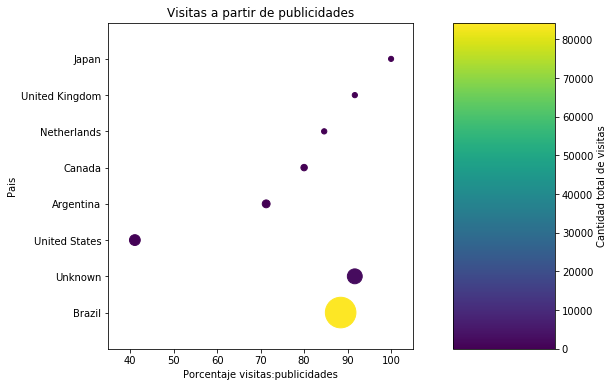

In [24]:
porcentaje_eventos = values_countries_total

cmap = mlib.cm.viridis
norm = mlib.colors.Normalize(vmin=0, vmax=84308)

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
# Dibuja los circulos segun la data de eventos, variando el radio segun el porcentaje 

plt.scatter(100/ratio_total_ads, countries_ads, s=(porcentaje_eventos)**(0.4)*10, c=cmap(norm(values_countries_total)))

# Agrega texto con el porcentaje representativo a cada evento
# plt.text(eventos[0]-25000, eventos.keys()[0], porcentaje_eventos[0].round(decimals=2).astype(str)+'%', color='white', weight=700)
# i=1
# for index, value in eventos[1:].iteritems():
#     plt.text(value+12000, index, porcentaje_eventos[i].round(2).astype(str)+'%')
#     i+=1

# Rotula y dibuja el gráfico
plt.xlabel('Porcentaje visitas:publicidades')
plt.ylabel('Pais')
plt.title('Visitas a partir de publicidades')
plt.axis([35, 105, -1, 8])


ax1 = plt.subplot(gs[1])
# Colorbar
ax = plt.gca()
cb1 = mlib.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Cantidad total de visitas')

plt.show()